In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

c:\venv\ilumpy\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Define font sizes
SIZE_DEFAULT = 20
SIZE_LARGE = 20
plt.rc("font", family="Arial")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

In [3]:
import os, json, re
import pandas as pd

ROOT = "."
acc_mcr, acc_mer = {}, {}

def normalize_id(filename: str) -> str:
    stem = os.path.splitext(filename)[0]
    mol_id = stem.split("_", 1)[-1]
    mol_id = re.sub(r'(_(?:model|fold|seed|run)_\d+)$', '', mol_id)
    return mol_id

for root, _, files in os.walk(ROOT):
    base = os.path.basename(root).lower()

    if "mcr" in base:
        acc = acc_mcr
    elif "mer" in base:
        acc = acc_mer
    else:
        continue

    if "aff" in base or "affinity" in base:
        bloco = "aff"
    elif "confidence" in base:
        bloco = "conf"
    else:
        continue

    for file in files:
        if not file.endswith(".json"):
            continue

        id_ = normalize_id(file)

        with open(os.path.join(root, file), "r", encoding="utf-8") as f:
            data = json.load(f)
        flat = pd.json_normalize(data, sep=".").to_dict(orient="records")[0]

        # cria linha se não existir
        if id_ not in acc:
            acc[id_] = {"id": id_}

        # regra de mescla: aff tem prioridade sobre conf em chaves duplicadas
        if bloco == "aff":
            acc[id_].update(flat)  # escreve tudo
        else:  # bloco == "conf"
            for k, v in flat.items():
                if k not in acc[id_]:  # não sobrescreve valores já vindos de aff
                    acc[id_][k] = v

df_mcr = pd.DataFrame(acc_mcr.values()).sort_values("id").reset_index(drop=True)
df_mer = pd.DataFrame(acc_mer.values()).sort_values("id").reset_index(drop=True)


In [4]:
df_mer

,id,affinity_pred_value,affinity_probability_binary,affinity_pred_value1,affinity_probability_binary1,affinity_pred_value2,affinity_probability_binary2,confidence_score,ptm,iptm,...,complex_plddt,complex_iplddt,complex_pde,complex_ipde,chains_ptm.0,chains_ptm.1,pair_chains_iptm.0.0,pair_chains_iptm.0.1,pair_chains_iptm.1.0,pair_chains_iptm.1.1
0,Z1000168264,0.652980,0.507244,0.911046,0.558395,0.394914,0.456094,0.929483,0.955907,0.828544,...,0.954718,0.884347,0.438652,1.956464,0.964712,0.946984,0.964712,0.472965,0.828544,0.946984
1,Z1000168466,0.683073,0.508137,1.086944,0.567777,0.279203,0.448497,0.940104,0.959729,0.867529,...,0.958247,0.896823,0.406777,1.590109,0.966172,0.941280,0.966172,0.509589,0.867529,0.941280
2,Z1001839898,1.427788,0.265026,1.904784,0.196175,0.950792,0.333878,0.887131,0.955808,0.771691,...,0.915991,0.621348,0.500377,2.637237,0.968990,0.932176,0.968990,0.407532,0.771691,0.932176
3,Z1001992086,0.781244,0.174827,0.921512,0.130392,0.640976,0.219262,0.915902,0.956721,0.826418,...,0.938273,0.798253,0.462598,2.054454,0.966499,0.919446,0.966499,0.396916,0.826418,0.919446
4,Z1001992164,0.625845,0.230834,0.687199,0.123650,0.564491,0.338017,0.926785,0.963867,0.883696,...,0.937557,0.762277,0.405116,1.531129,0.969562,0.899763,0.969562,0.414216,0.883696,0.899763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,Z998919190,1.070356,0.399200,1.149001,0.461841,0.991711,0.336559,0.940572,0.957628,0.857877,...,0.961245,0.902629,0.425845,1.823745,0.964609,0.958730,0.964609,0.499251,0.857877,0.958730
10231,Z999698236,1.849122,0.139395,1.722656,0.099491,1.975587,0.179299,0.939245,0.962810,0.908592,...,0.946908,0.831089,0.383801,1.224415,0.967094,0.910783,0.967094,0.543243,0.908592,0.910783
10232,Z999736446,0.666162,0.220944,0.005856,0.159232,1.326469,0.282655,0.957303,0.970148,0.931404,...,0.963778,0.933081,0.345879,1.047056,0.973008,0.970035,0.973008,0.615582,0.931404,0.970035
10233,Z999737524,1.156464,0.429108,1.173027,0.292966,1.139902,0.565250,0.936395,0.959316,0.844195,...,0.959444,0.891357,0.431938,2.046457,0.968025,0.972935,0.968025,0.518609,0.844195,0.972935


In [5]:
df_mcr

,id,affinity_pred_value,affinity_probability_binary,affinity_pred_value1,affinity_probability_binary1,affinity_pred_value2,affinity_probability_binary2,confidence_score,ptm,iptm,...,pair_chains_iptm.1.2,pair_chains_iptm.1.3,pair_chains_iptm.2.0,pair_chains_iptm.2.1,pair_chains_iptm.2.2,pair_chains_iptm.2.3,pair_chains_iptm.3.0,pair_chains_iptm.3.1,pair_chains_iptm.3.2,pair_chains_iptm.3.3
0,Z1000168264,0.800049,0.537577,0.704282,0.666135,0.895817,0.409019,0.949826,0.962116,0.951837,...,0.952261,0.421416,0.943650,0.946253,0.983944,0.416609,0.799598,0.795380,0.791682,0.955602
1,Z1000168466,0.215831,0.370867,0.580909,0.291934,-0.149246,0.449800,0.947146,0.967097,0.959063,...,0.956276,0.634779,0.950716,0.954219,0.985689,0.683293,0.897233,0.897683,0.906965,0.973897
2,Z1001839898,0.397327,0.596511,0.146602,0.839598,0.648052,0.353423,0.953856,0.962482,0.952337,...,0.952896,0.454221,0.944043,0.946288,0.981786,0.463209,0.815702,0.812223,0.807527,0.959672
3,Z1001992086,0.158999,0.513273,0.203731,0.476460,0.114267,0.550086,0.950092,0.958481,0.947000,...,0.948283,0.339683,0.937700,0.940876,0.983053,0.362501,0.796133,0.793528,0.786707,0.945081
4,Z1001992164,0.083134,0.628275,-0.468918,0.740709,0.635186,0.515841,0.952330,0.962530,0.952751,...,0.949874,0.425745,0.943037,0.946300,0.983333,0.424194,0.868575,0.859653,0.842613,0.953719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,Z998919190,0.564442,0.417560,0.291118,0.500322,0.837767,0.334798,0.950616,0.959553,0.948217,...,0.950067,0.395768,0.938638,0.943188,0.983130,0.398133,0.737229,0.733336,0.734396,0.966396
10231,Z999698236,1.444924,0.380801,1.134435,0.466958,1.755412,0.294643,0.951599,0.960748,0.949713,...,0.951206,0.332626,0.941490,0.945028,0.983547,0.374758,0.761987,0.750812,0.751616,0.933853
10232,Z999736446,-0.208209,0.392075,-0.110544,0.441091,-0.305874,0.343059,0.950332,0.960506,0.949743,...,0.949693,0.392146,0.941494,0.944943,0.983164,0.412575,0.747242,0.749835,0.751589,0.965515
10233,Z999737524,0.959733,0.439797,0.948884,0.479238,0.970581,0.400356,0.950480,0.960622,0.949495,...,0.951835,0.427000,0.941306,0.944354,0.981839,0.444550,0.735302,0.731978,0.746107,0.973746


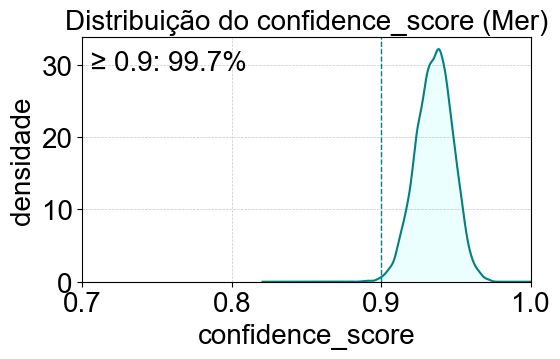

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mer["confidence_score"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("confidence_score")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do confidence_score (Mer)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


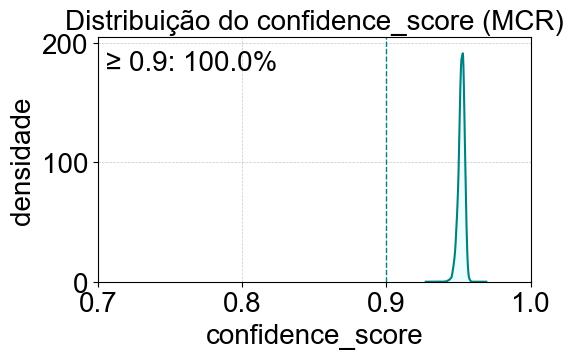

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mcr["confidence_score"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("confidence_score")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do confidence_score (MCR)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


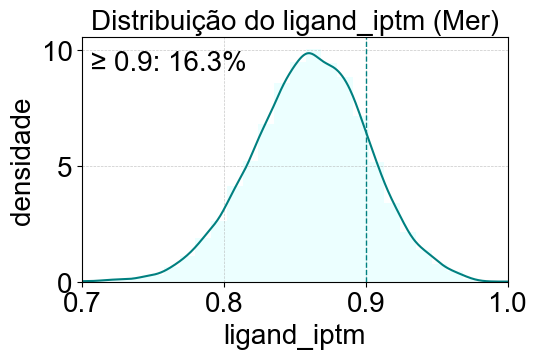

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mer["ligand_iptm"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("ligand_iptm")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do ligand_iptm (Mer)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


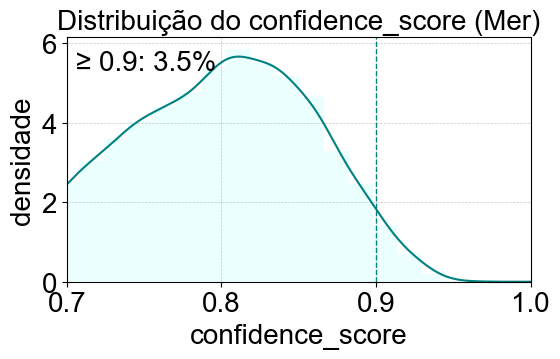

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) série numérica, sem NaN
s = pd.to_numeric(df_mcr["ligand_iptm"], errors="coerce").dropna()

# 2) figura
fig, ax = plt.subplots(figsize=(6,4))

# 3) histograma em densidade
ax.hist(s, bins=30, density=True, alpha=0.6, color='lightcyan')

# 4) curva de densidade (se seu pandas suportar .plot(kind='kde'))
try:
    s.plot(kind="kde", ax=ax, color='teal')
except Exception:
    pass  # se não tiver scipy/statsmodels, segue só com o hist

# 5) linha em 0.9
ax.axvline(0.9, linestyle="--", linewidth=1, color='teal')

# 6) rótulos e título
ax.set_xlabel("confidence_score")
ax.set_ylabel("densidade")
ax.set_title("Distribuição do confidence_score (Mer)")

# 7) limites (opcional, scores costumam ser 0–1)
ax.set_xlim(0, 1)
plt.xlim([0.7,1.0])

# 8) anotação: % de pontos ≥ 0.9 (opcional)
pct = (s >= 0.9).mean()
ax.text(0.02, 0.95, f"≥ 0.9: {pct:.1%}", transform=ax.transAxes, va="top", color='black')

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
conf = pd.to_numeric(df_mer["confidence_score"], errors="coerce")
mask = x.notna() & y.notna() & conf.notna()

lo = conf[mask] < 0.90
hi = ~lo

plt.figure(figsize=(6,4))
plt.scatter(x[mask][hi], y[mask][hi], s=20, alpha=0.7, label="conf ≥ 0.93")
plt.scatter(x[mask][lo], y[mask][lo], s=20, alpha=0.7, label="conf < 0.93", color="red")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("MER: ligand_iptm vs affinity_probability_binary")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


NameError: name 'x' is not defined

In [35]:
conf = pd.to_numeric(df_mcr["confidence_score"], errors="coerce")
mask = x.notna() & y.notna() & conf.notna()

lo = conf[mask] < 0.9
hi = ~lo

plt.figure(figsize=(6,4))
plt.scatter(x[mask][hi], y[mask][hi], s=20, alpha=0.7, label="conf ≥ 0.9")
plt.scatter(x[mask][lo], y[mask][lo], s=20, alpha=0.7, label="conf < 0.9", color="red")
plt.xlabel(xcol); plt.ylabel(ycol)
plt.title("MER: ligand_iptm vs affinity_probability_binary")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


NameError: name 'x' is not defined

### Análise da confiança

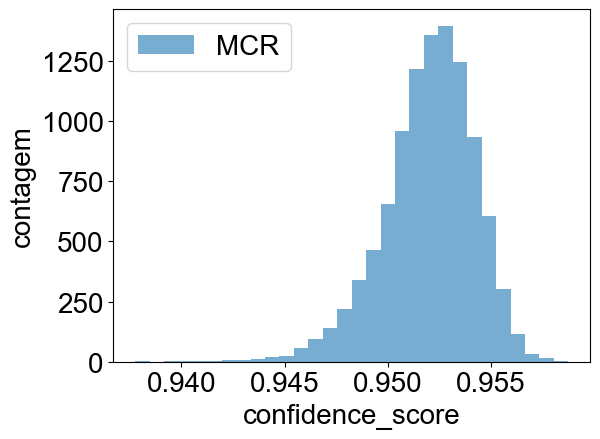

In [36]:
vals_mcr = df_mcr["confidence_score"].dropna().astype(float).values
plt.hist(vals_mcr, bins=30, alpha=0.6, label="MCR")

plt.xlabel("confidence_score")
plt.ylabel("contagem")
plt.legend()
plt.tight_layout()
plt.show()

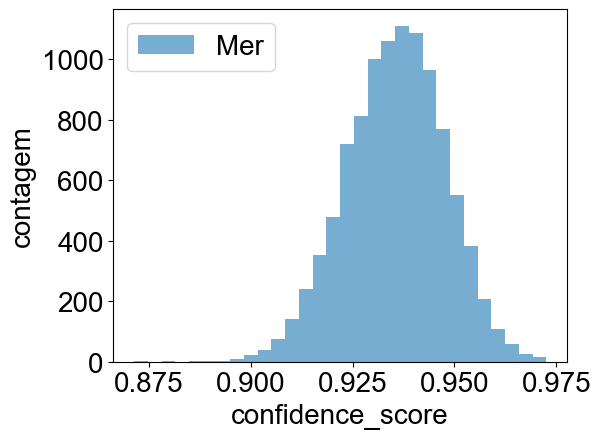

In [37]:
vals_mer = df_mer["confidence_score"].dropna().astype(float).values
plt.hist(vals_mer, bins=30, alpha=0.6, label="Mer")

plt.xlabel("confidence_score")
plt.ylabel("contagem")
plt.legend()
plt.tight_layout()
plt.show()

<Axes: title={'center': 'MER'}, xlabel='ligand_iptm', ylabel='affinity_probability_binary'>

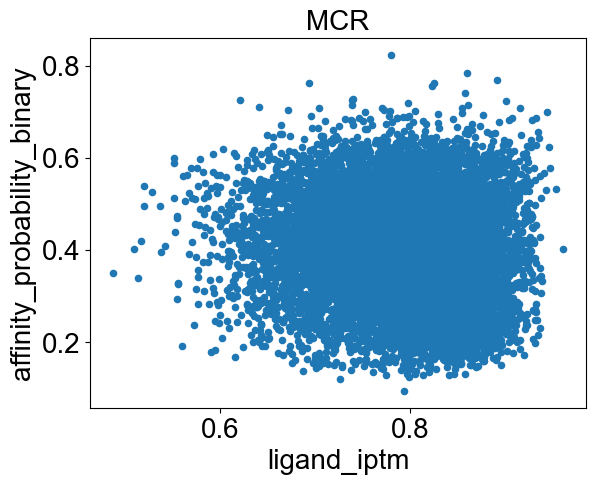

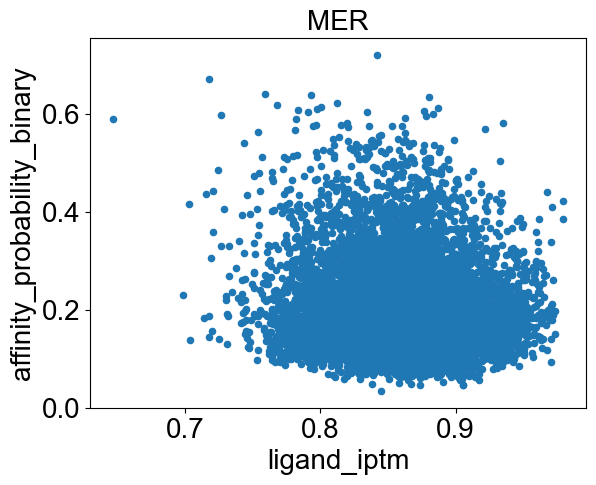

In [39]:
xcol = "ligand_iptm"
ycol = "affinity_probability_binary"

mcr = df_mcr[[xcol,ycol]].dropna().astype(float)
mcr.plot(kind="scatter", x=xcol, y=ycol, title="MCR")

mer = df_mer[[xcol,ycol]].dropna().astype(float)
mer.plot(kind="scatter", x=xcol, y=ycol, title="MER")

<Axes: title={'center': 'MER'}, xlabel='iptm', ylabel='affinity_probability_binary'>

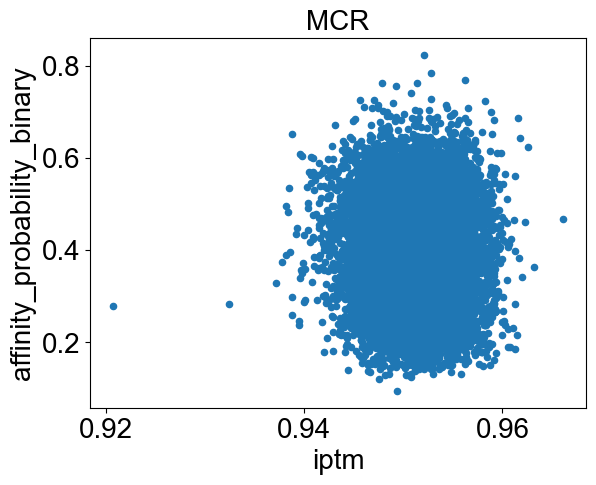

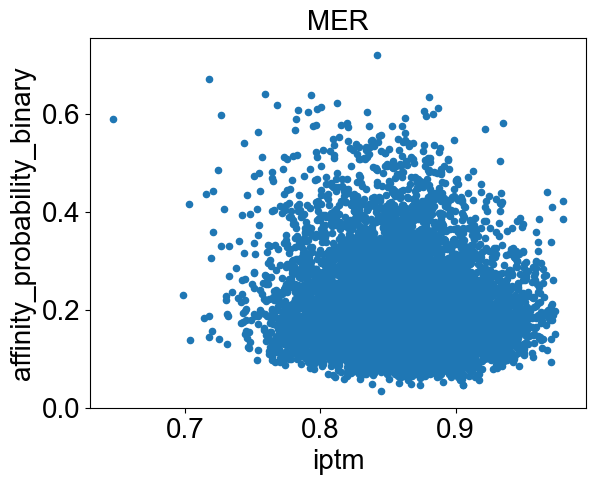

In [40]:
xcol = "iptm"
ycol = "affinity_probability_binary"

mcr = df_mcr[[xcol,ycol]].dropna().astype(float)
mcr.plot(kind="scatter", x=xcol, y=ycol, title="MCR")

mer = df_mer[[xcol,ycol]].dropna().astype(float)
mer.plot(kind="scatter", x=xcol, y=ycol, title="MER")

<Axes: title={'center': 'MER'}, xlabel='ligand_iptm', ylabel='confidence_score'>

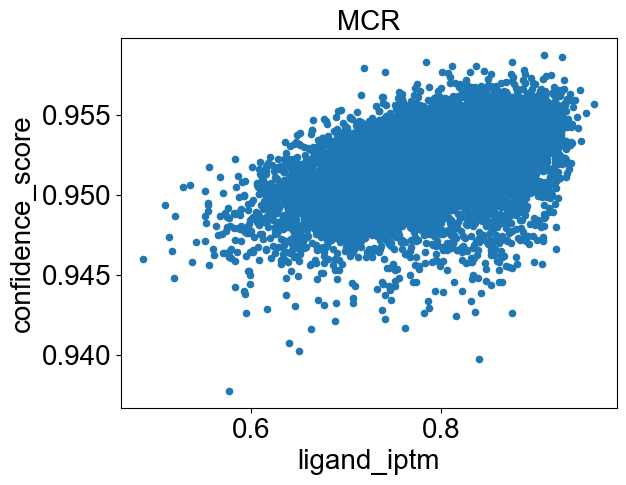

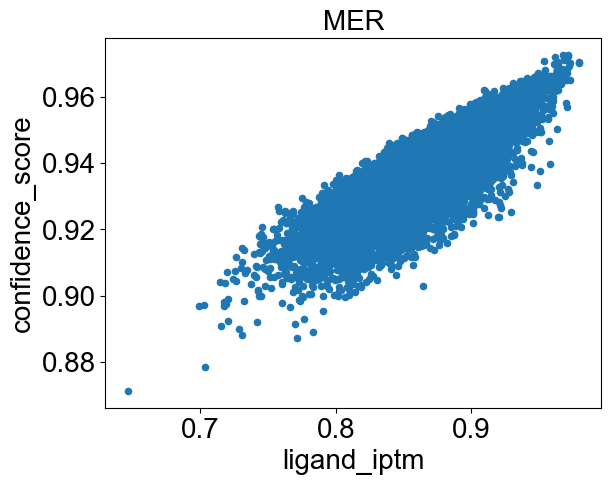

In [41]:
xcol = "ligand_iptm"
ycol = "confidence_score"

mcr = df_mcr[[xcol,ycol]].dropna().astype(float)
mcr.plot(kind="scatter", x=xcol, y=ycol, title="MCR")

mer = df_mer[[xcol,ycol]].dropna().astype(float)
mer.plot(kind="scatter", x=xcol, y=ycol, title="MER")

### MCR

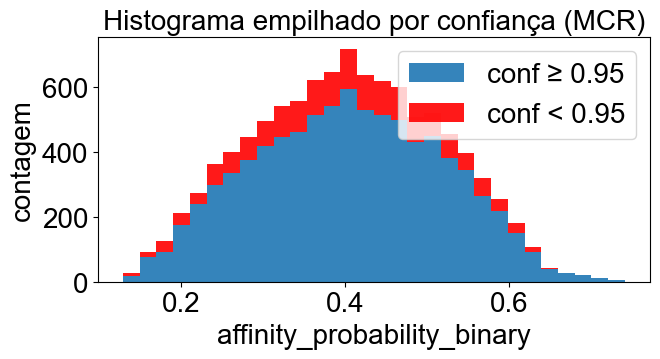

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) selecione e limpe as séries
aff = pd.to_numeric(df_mcr["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df_mcr["confidence_score"], errors="coerce")
valid = aff.notna() & conf.notna()
aff = aff[valid]; conf = conf[valid]

# 2) defina os bins (ajuste o número se quiser)
bins = 30
counts_low, bin_edges = np.histogram(aff[conf < 0.95], bins=bins)
counts_high, _        = np.histogram(aff[conf >= 0.95], bins=bin_edges)

# 3) plote empilhado (a parte vermelha é proporcional ao total do bin)
bin_lefts = bin_edges[:-1]
bin_widths = np.diff(bin_edges)

plt.figure(figsize=(7,4))
# camada de cima: “alto” (≥ 0.9) — sem cor explícita (usa padrão)
plt.bar(bin_lefts, counts_high, width=bin_widths, align="edge", alpha=0.9, label="conf ≥ 0.95")
# camada de baixo: “baixo” (< 0.9) — vermelho
plt.bar(bin_lefts, counts_low, width=bin_widths, align="edge", alpha=0.9,
        bottom=counts_high, label="conf < 0.95", color="red")

plt.xlabel("affinity_probability_binary")
plt.ylabel("contagem")
plt.title("Histograma empilhado por confiança (MCR)")
plt.legend()
plt.tight_layout()
plt.show()


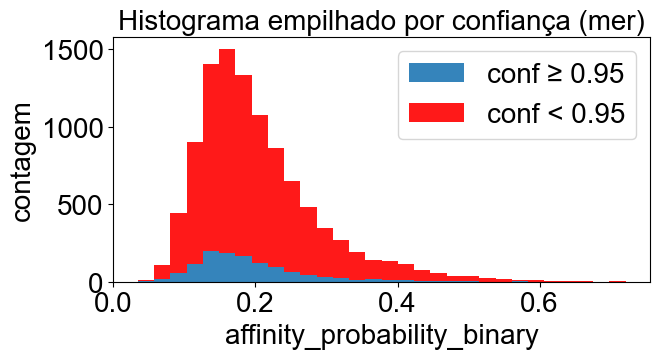

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) selecione e limpe as séries
aff = pd.to_numeric(df_mer["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df_mer["confidence_score"], errors="coerce")
valid = aff.notna() & conf.notna()
aff = aff[valid]; conf = conf[valid]

# 2) defina os bins (ajuste o número se quiser)
bins = 30
counts_low, bin_edges = np.histogram(aff[conf < 0.95], bins=bins)
counts_high, _        = np.histogram(aff[conf >= 0.95], bins=bin_edges)

# 3) plote empilhado (a parte vermelha é proporcional ao total do bin)
bin_lefts = bin_edges[:-1]
bin_widths = np.diff(bin_edges)

plt.figure(figsize=(7,4))
# camada de cima: “alto” (≥ 0.9) — sem cor explícita (usa padrão)
plt.bar(bin_lefts, counts_high, width=bin_widths, align="edge", alpha=0.9, label="conf ≥ 0.95")
# camada de baixo: “baixo” (< 0.9) — vermelho
plt.bar(bin_lefts, counts_low, width=bin_widths, align="edge", alpha=0.9,
        bottom=counts_high, label="conf < 0.95", color="red")

plt.xlabel("affinity_probability_binary")
plt.ylabel("contagem")
plt.title("Histograma empilhado por confiança (mer)")
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

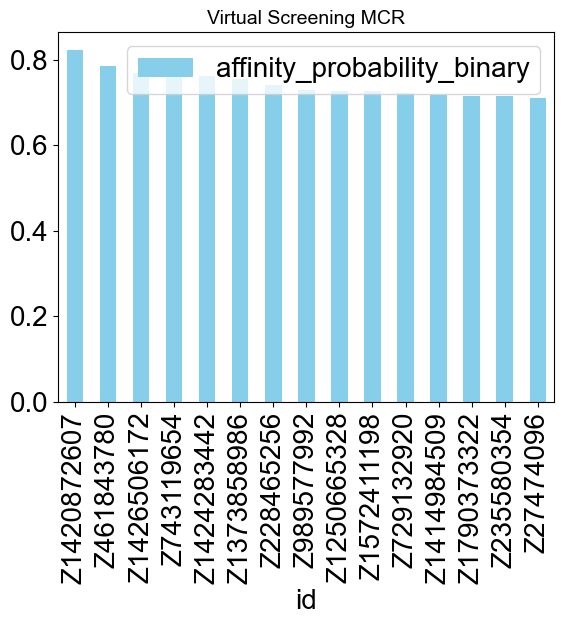

3431     Z1420872607
8070      Z461843780
3477     Z1426506172
8880      Z743119654
3462     Z1424283442
3029     Z1373858986
5697      Z228465256
10123     Z989577992
1803     Z1250665328
4196     Z1572411198
8677      Z729132920
3276     Z1414984509
5167     Z1790373322
5764      Z235580354
6193       Z27474096
Name: id, dtype: object


In [44]:
top_15_mcr = df_mcr.sort_values("affinity_probability_binary", ascending=False).head(15)

plt.figure(figsize=(10,6))
top_15_mcr.plot(x='id', y='affinity_probability_binary', kind="bar", color="skyblue")
plt.title("Virtual Screening MCR", fontsize=14)
plt.show()

print(top_15_mcr["id"])

# colcar confiancia!!! 

### MER

<Figure size 1000x600 with 0 Axes>

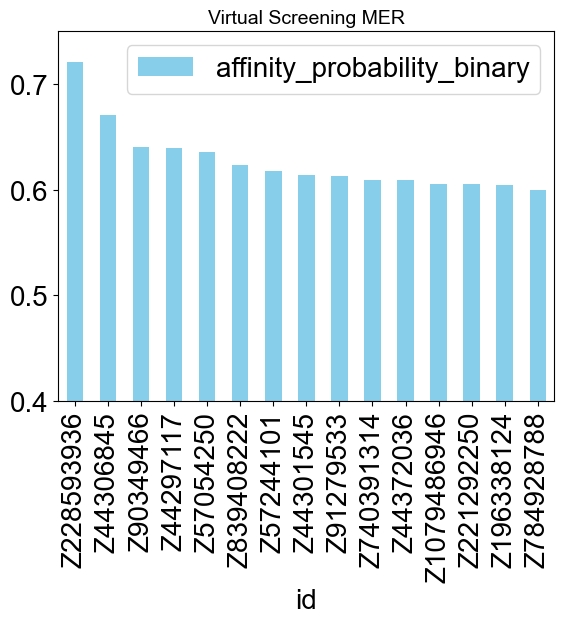

In [45]:
top_15_mer = df_mer.sort_values("affinity_probability_binary", ascending=False).head(15)

plt.figure(figsize=(10,6))
top_15_mer.plot(x='id', y='affinity_probability_binary', kind="bar", color="skyblue")
plt.ylim(0.4,0.75)
plt.title("Virtual Screening MER", fontsize=14)
plt.show()

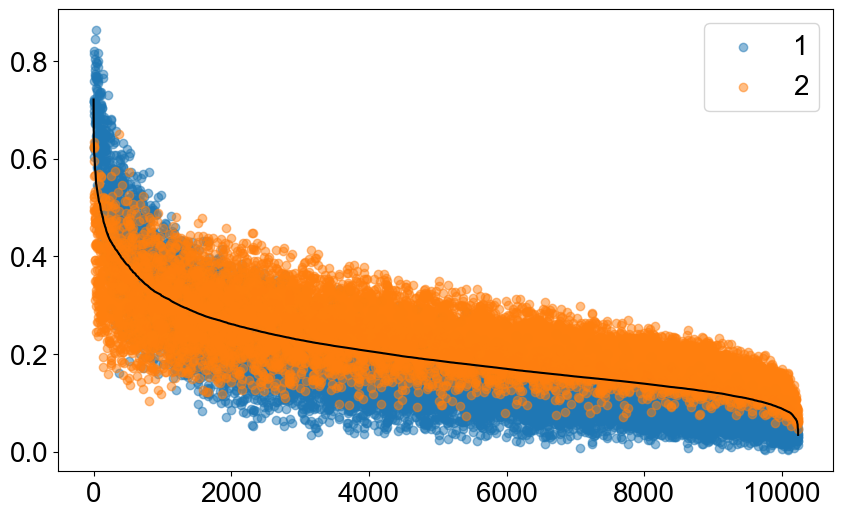

In [46]:
df_mer_sorted = df_mer.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mer_sorted.index, df_mer_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mer_sorted.index, df_mer_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mer_sorted.index, df_mer_sorted["affinity_probability_binary"], color="blacK")
plt.legend()

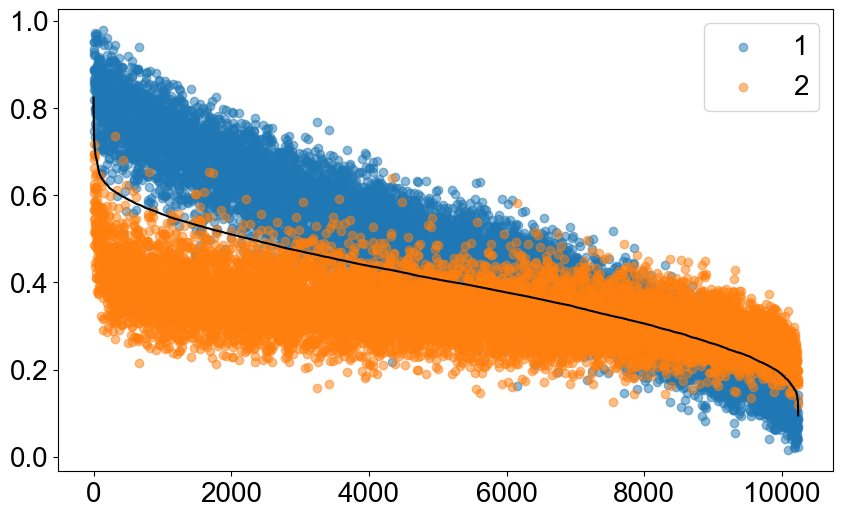

In [47]:
df_mcr_sorted = df_mcr.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary"], color="blacK")
plt.legend()

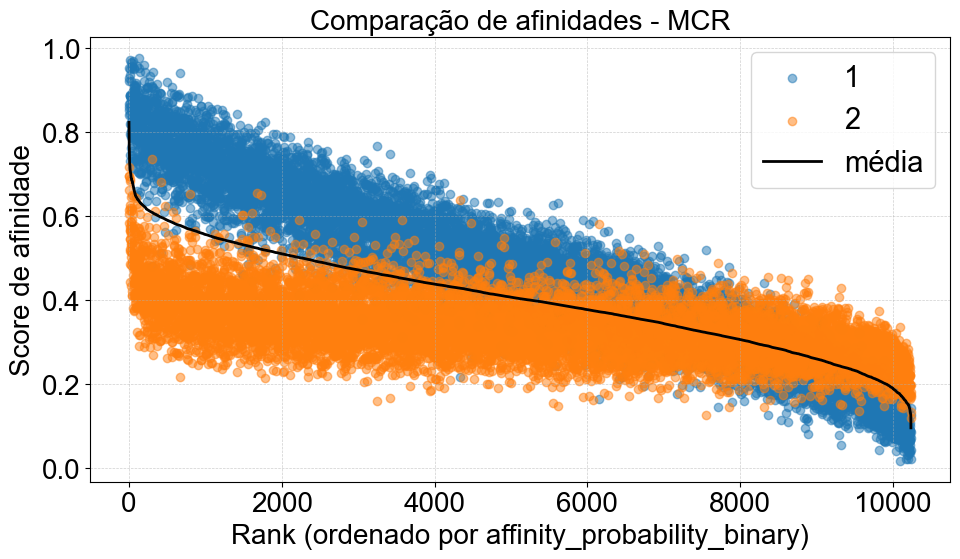

In [48]:
df_mcr_sorted = df_mcr.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mcr_sorted.index, df_mcr_sorted["affinity_probability_binary"], color="black", linewidth=2, label="média")

plt.title("Comparação de afinidades - MCR")
plt.xlabel("Rank (ordenado por affinity_probability_binary)")
plt.ylabel("Score de afinidade")
plt.legend(fontsize=21)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


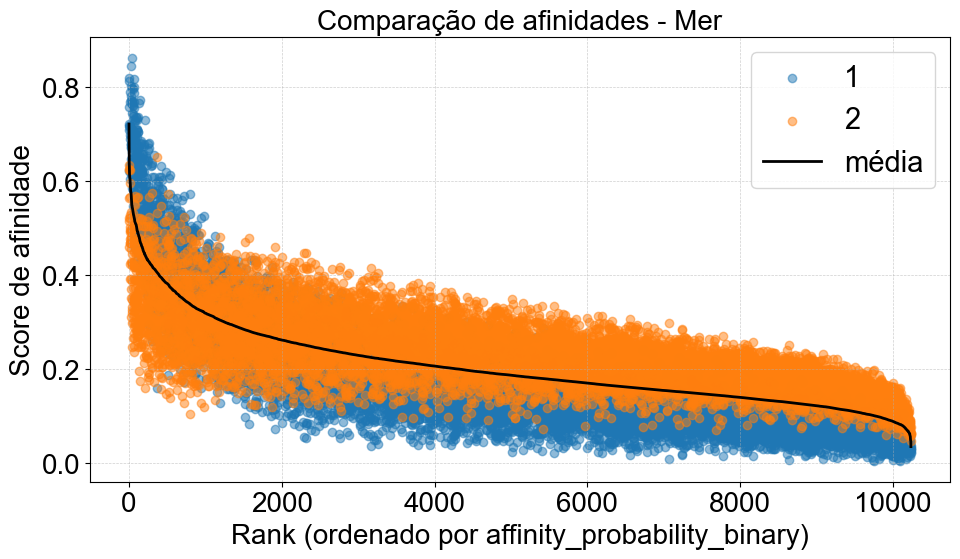

In [49]:
df_mer_sorted = df_mer.sort_values("affinity_probability_binary", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.scatter(df_mcr_sorted.index, df_mer_sorted["affinity_probability_binary1"], alpha=0.5, label="1")
plt.scatter(df_mcr_sorted.index, df_mer_sorted["affinity_probability_binary2"], alpha=0.5, label="2")
plt.plot(df_mcr_sorted.index, df_mer_sorted["affinity_probability_binary"], color="black", linewidth=2, label="média")

plt.title("Comparação de afinidades - Mer")
plt.xlabel("Rank (ordenado por affinity_probability_binary)")
plt.ylabel("Score de afinidade")
plt.legend(fontsize=21)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


### Relações entre as variáveis

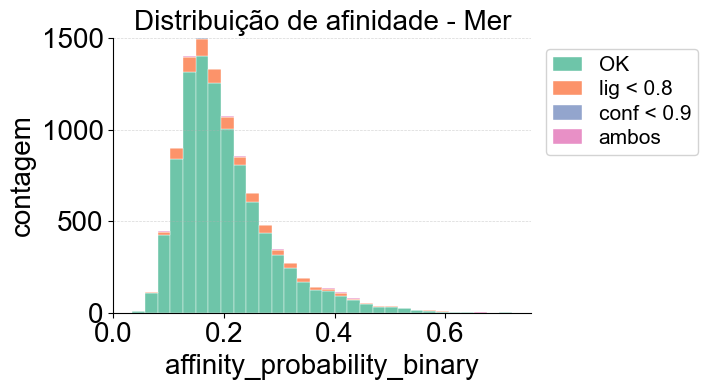

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== escolha a paleta =====
PAL = "set2"   # "tableau" | "set2" | "muted"

PALETTES = {
    # tons vivos, equilibrados (Tableau 10)
    "tableau": {
        "OK":   "#4E79A7",  # azul
        "LIG":  "#F28E2B",  # laranja
        "CONF": "#E15759",  # vermelho
        "BOTH": "#76B7B2",  # teal
    },
    # Set2 (mais suave)
    "set2": {
        "OK":   "#66C2A5",  # verde-água
        "LIG":  "#FC8D62",  # laranja
        "CONF": "#8DA0CB",  # azul-lilás
        "BOTH": "#E78AC3",  # rosa
    },
    # Muted (alto contraste sem “gritar”)
    "muted": {
        "OK":   "#3B7EA1",  # azul petróleo
        "LIG":  "#D17C2E",  # cobre
        "CONF": "#C33C3C",  # vermelho tijolo
        "BOTH": "#7A6BB7",  # roxo
    },
}
COL = PALETTES[PAL]

# ===== seus dados =====
df = df_mer  # ou df_mcr

aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

mask = aff.notna() & conf.notna() & lig.notna()
aff, conf, lig = aff[mask], conf[mask], lig[mask]

fail_both = (conf < 0.9) & (lig < 0.8)
fail_conf = (conf < 0.9) & ~(lig < 0.8)
fail_lig  = ~(conf < 0.9) & (lig < 0.8)
ok        = ~(fail_both | fail_conf | fail_lig)

bin_edges = np.histogram_bin_edges(aff, bins=30)
lefts, widths = bin_edges[:-1], np.diff(bin_edges)

c_ok,   _ = np.histogram(aff[ok],        bins=bin_edges)
c_lig,  _ = np.histogram(aff[fail_lig],  bins=bin_edges)
c_conf, _ = np.histogram(aff[fail_conf], bins=bin_edges)
c_both, _ = np.histogram(aff[fail_both], bins=bin_edges)

fig, ax = plt.subplots(figsize=(7.5, 4.3))

ax.bar(lefts, c_ok,   width=widths, align="edge", alpha=0.95,
       edgecolor="white", linewidth=0.3, label="OK",         color=COL["OK"])
ax.bar(lefts, c_lig,  width=widths, align="edge", alpha=0.95,
       bottom=c_ok, edgecolor="white", linewidth=0.3, label="lig < 0.8",  color=COL["LIG"])
ax.bar(lefts, c_conf, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig, edgecolor="white", linewidth=0.3, label="conf < 0.9", color=COL["CONF"])
ax.bar(lefts, c_both, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig+c_conf, edgecolor="white", linewidth=0.3, label="ambos",     color=COL["BOTH"])

ax.set_xlabel("affinity_probability_binary")
ax.set_ylabel("contagem")
ax.set_title(f"Distribuição de afinidade - Mer")

ax.grid(True, axis="y", linestyle="--", linewidth=0.5, alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(
    fontsize=15, markerscale=0.9, handlelength=1.4,
    labelspacing=0.25, borderpad=0.35, framealpha=0.85,
    bbox_to_anchor=(1.01, 1), loc="upper left"
)

plt.tight_layout()
plt.show()


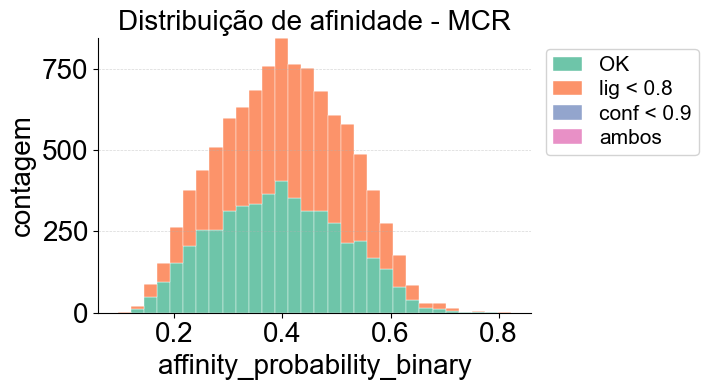

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== escolha a paleta =====
PAL = "set2"   # "tableau" | "set2" | "muted"

PALETTES = {
    # tons vivos, equilibrados (Tableau 10)
    "tableau": {
        "OK":   "#4E79A7",  # azul
        "LIG":  "#F28E2B",  # laranja
        "CONF": "#E15759",  # vermelho
        "BOTH": "#76B7B2",  # teal
    },
    # Set2 (mais suave)
    "set2": {
        "OK":   "#66C2A5",  # verde-água
        "LIG":  "#FC8D62",  # laranja
        "CONF": "#8DA0CB",  # azul-lilás
        "BOTH": "#E78AC3",  # rosa
    },
    # Muted (alto contraste sem “gritar”)
    "muted": {
        "OK":   "#3B7EA1",  # azul petróleo
        "LIG":  "#D17C2E",  # cobre
        "CONF": "#C33C3C",  # vermelho tijolo
        "BOTH": "#7A6BB7",  # roxo
    },
}
COL = PALETTES[PAL]

# ===== seus dados =====
df = df_mcr  # ou df_mcr

aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

mask = aff.notna() & conf.notna() & lig.notna()
aff, conf, lig = aff[mask], conf[mask], lig[mask]

fail_both = (conf < 0.9) & (lig < 0.8)
fail_conf = (conf < 0.9) & ~(lig < 0.8)
fail_lig  = ~(conf < 0.9) & (lig < 0.8)
ok        = ~(fail_both | fail_conf | fail_lig)

bin_edges = np.histogram_bin_edges(aff, bins=30)
lefts, widths = bin_edges[:-1], np.diff(bin_edges)

c_ok,   _ = np.histogram(aff[ok],        bins=bin_edges)
c_lig,  _ = np.histogram(aff[fail_lig],  bins=bin_edges)
c_conf, _ = np.histogram(aff[fail_conf], bins=bin_edges)
c_both, _ = np.histogram(aff[fail_both], bins=bin_edges)

fig, ax = plt.subplots(figsize=(7.5, 4.3))

ax.bar(lefts, c_ok,   width=widths, align="edge", alpha=0.95,
       edgecolor="white", linewidth=0.3, label="OK",         color=COL["OK"])
ax.bar(lefts, c_lig,  width=widths, align="edge", alpha=0.95,
       bottom=c_ok, edgecolor="white", linewidth=0.3, label="lig < 0.8",  color=COL["LIG"])
ax.bar(lefts, c_conf, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig, edgecolor="white", linewidth=0.3, label="conf < 0.9", color=COL["CONF"])
ax.bar(lefts, c_both, width=widths, align="edge", alpha=0.95,
       bottom=c_ok+c_lig+c_conf, edgecolor="white", linewidth=0.3, label="ambos",     color=COL["BOTH"])

ax.set_xlabel("affinity_probability_binary")
ax.set_ylabel("contagem")
ax.set_title(f"Distribuição de afinidade - MCR")

ax.grid(True, axis="y", linestyle="--", linewidth=0.5, alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(
    fontsize=15, markerscale=0.9, handlelength=1.4,
    labelspacing=0.25, borderpad=0.35, framealpha=0.85,
    bbox_to_anchor=(1.01, 1), loc="upper left"
)

plt.tight_layout()
plt.show()


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


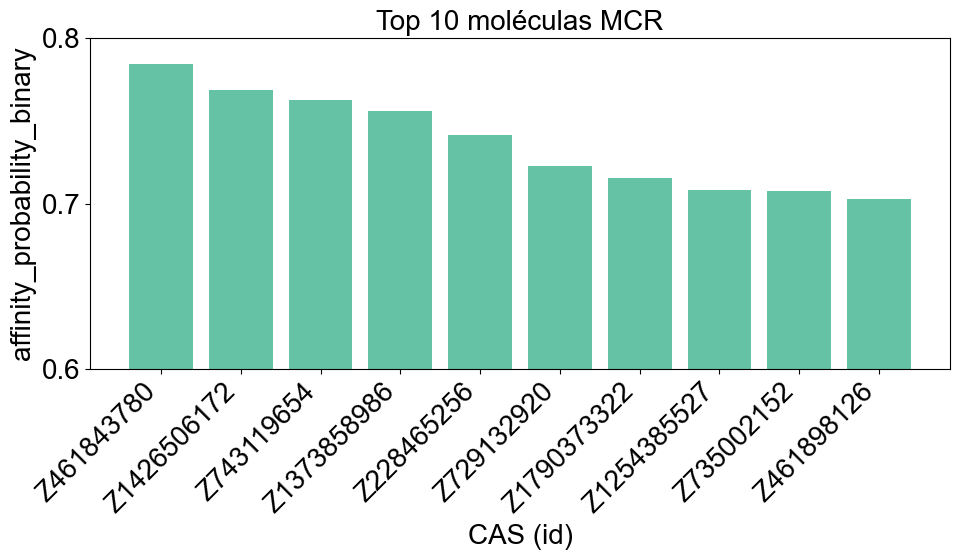

8070     Z461843780
3477    Z1426506172
8880     Z743119654
3029    Z1373858986
5697     Z228465256
8677     Z729132920
5167    Z1790373322
1869    Z1254385527
8783     Z735002152
8071     Z461898126
Name: id, dtype: object


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# escolha o conjunto
df = df_mcr   # troque para df_mcr se quiser o outro

# garante colunas numéricas
aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

# filtros
mask = aff.notna() & (conf >= 0.9) & (lig >= 0.8)

df_ok = df.loc[mask, ["id", "affinity_probability_binary"]].copy()
df_ok = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

# --- Plot: ranking top-10 por afinidade, eixo X = CAS (id) ---
plt.figure(figsize=(10,6))
plt.bar(df_ok["id"], df_ok["affinity_probability_binary"], color= "#66C2A5")
plt.xlabel("CAS (id)")
plt.ylabel("affinity_probability_binary")
plt.title("Top 10 moléculas MCR")
plt.xticks(rotation=45, ha="right")
plt.ylim([0.6,0.8])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.tight_layout()
plt.show()

df_ok_mcr = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)
print(df_ok_mcr['id'])

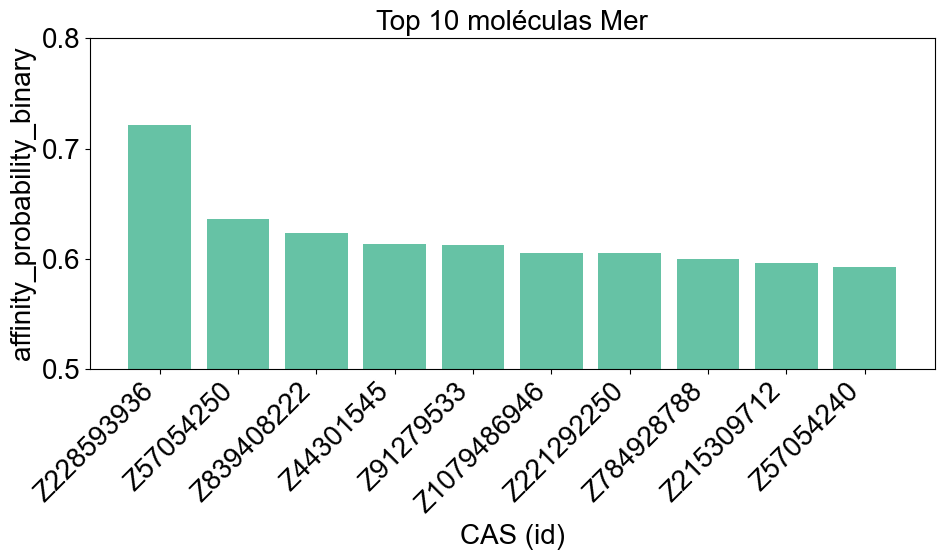

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# escolha o conjunto
df = df_mer   # troque para df_mcr se quiser o outro

# garante colunas numéricas
aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

# filtros
mask = aff.notna() & (conf >= 0.9) & (lig >= 0.8)

df_ok = df.loc[mask, ["id", "affinity_probability_binary"]].copy()
df_ok = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

# --- Plot: ranking top-10 por afinidade, eixo X = CAS (id) ---
plt.figure(figsize=(10,6))
plt.bar(df_ok["id"], df_ok["affinity_probability_binary"], color= "#66C2A5")
plt.xlabel("CAS (id)")
plt.ylabel("affinity_probability_binary")
plt.ylim([0.5,0.8])
plt.title("Top 10 moléculas Mer")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

df_ok_mer = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

In [82]:
comuns = set(df_ok_mcr["id"]) & set(df_ok_mer["id"])
print(comuns)

{'Z461843780'}


In [55]:
df_ok_mer

,id,affinity_probability_binary
5703,Z228593936,0.721116
8287,Z57054250,0.635873
9297,Z839408222,0.623449
7976,Z44301545,0.613800
9724,Z91279533,0.612868
264,Z1079486946,0.605623
5550,Z221292250,0.605106
9007,Z784928788,0.599691
5443,Z215309712,0.595866
8285,Z57054240,0.592351


In [56]:
df_ok_mcr

,id,affinity_probability_binary
8070,Z461843780,0.784429
3477,Z1426506172,0.768528
8880,Z743119654,0.762651
3029,Z1373858986,0.755799
5697,Z228465256,0.741263
8677,Z729132920,0.722703
5167,Z1790373322,0.715502
1869,Z1254385527,0.708084
8783,Z735002152,0.707686
8071,Z461898126,0.702584


## Sem filtros

#### MCR

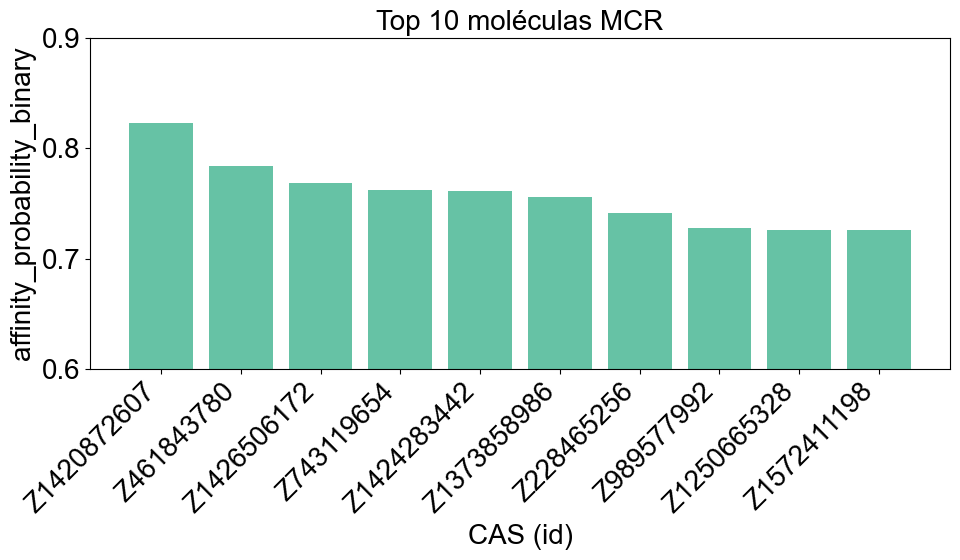

3431     Z1420872607
8070      Z461843780
3477     Z1426506172
8880      Z743119654
3462     Z1424283442
3029     Z1373858986
5697      Z228465256
10123     Z989577992
1803     Z1250665328
4196     Z1572411198
Name: id, dtype: object


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# escolha o conjunto
df = df_mcr   # troque para df_mcr se quiser o outro

# garante colunas numéricas
aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

# filtros
#mask = aff.notna() & (conf >= 0.9) & (lig >= 0.8)

df_ok = df.copy()
df_ok = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

# --- Plot: ranking top-10 por afinidade, eixo X = CAS (id) ---
plt.figure(figsize=(10,6))
plt.bar(df_ok["id"], df_ok["affinity_probability_binary"], color= "#66C2A5")
plt.xlabel("CAS (id)")
plt.ylabel("affinity_probability_binary")
plt.title("Top 10 moléculas MCR")
plt.xticks(rotation=45, ha="right")
plt.ylim([0.6,0.9])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.tight_layout()
plt.show()

df_ok_mcr = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)
print(df_ok_mcr['id'])

### mer

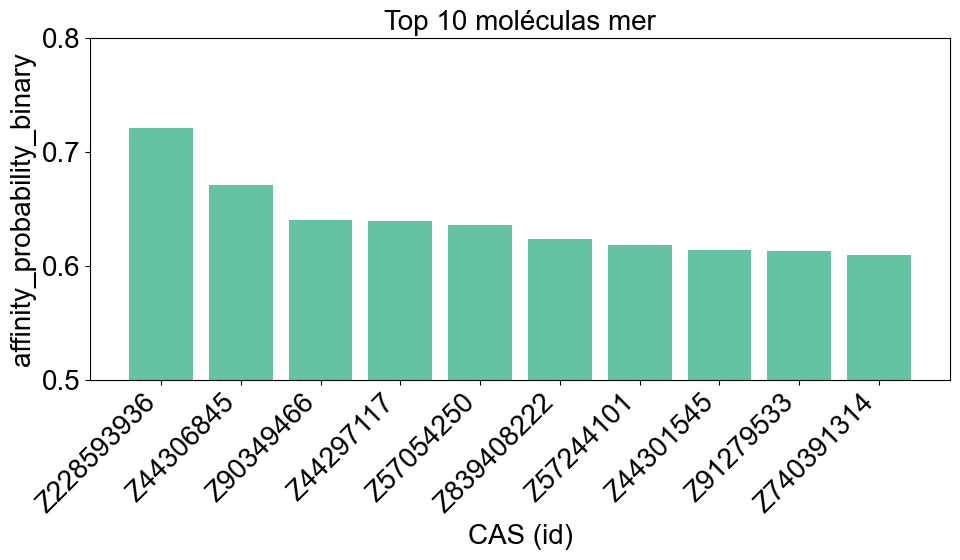

5703    Z228593936
7980     Z44306845
9630     Z90349466
7965     Z44297117
8287     Z57054250
9297    Z839408222
8289     Z57244101
7976     Z44301545
9724     Z91279533
8840    Z740391314
Name: id, dtype: object 5703    0.721116
7980    0.670928
9630    0.640478
7965    0.639309
8287    0.635873
9297    0.623449
8289    0.618205
7976    0.613800
9724    0.612868
8840    0.609700
Name: affinity_probability_binary, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# escolha o conjunto
df = df_mer   # troque para df_mcr se quiser o outro

# garante colunas numéricas
aff = pd.to_numeric(df["affinity_probability_binary"], errors="coerce")
conf = pd.to_numeric(df["confidence_score"], errors="coerce")
lig  = pd.to_numeric(df["ligand_iptm"], errors="coerce")

# filtros
#mask = aff.notna() & (conf >= 0.9) & (lig >= 0.8)

df_ok = df.copy()
df_ok = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)

# --- Plot: ranking top-10 por afinidade, eixo X = CAS (id) ---
plt.figure(figsize=(10,6))
plt.bar(df_ok["id"], df_ok["affinity_probability_binary"], color= "#66C2A5")
plt.xlabel("CAS (id)")
plt.ylabel("affinity_probability_binary")
plt.title("Top 10 moléculas mer")
plt.xticks(rotation=45, ha="right")
plt.ylim([0.5,0.8])
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.tight_layout()
plt.show()

df_ok_mer = df_ok.sort_values("affinity_probability_binary", ascending=False).head(10)
print(df_ok_mer['id'],df_ok_mer['affinity_probability_binary'])